<a href="https://colab.research.google.com/github/minsu1206/BasicAI/blob/main/MNIST_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
% tensorflow_version 1.x
import tensorflow as tf

TensorFlow 1.x selected.


In [2]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
import numpy as np

mnist = fetch_openml('mnist_784')
N = 40000
indices = np.random.permutation(range(70000))[:N]
X = mnist.data[indices]
y = mnist.target[indices]
Y = np.eye(10)[y.astype(int)]
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8)
X_train , X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=4000)

In [3]:
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from keras.layers import Dropout
from sklearn.utils import shuffle
from keras import backend as K # 별칭으로 따로 구분되어있지 않은 함수는 keras.backend로 처리 수행
import keras

def W(shape):
    return K.truncated_normal(shape, stddev=0.01)

n_in = 784
n_hiddens=[200,200,200]
n_out = 10
p_keep=0.5
activation = 'relu'
layer = [n_in]+n_hiddens
init = tf.keras.initializers.TruncatedNormal(mean=0, stddev=0.05, seed=None)
# weight의 초기화가 꼭 필요함. keras의 경우ㅇㅇ
model = Sequential()
for i, input_dim in enumerate((layer)[:-1]):
    model.add(Dense(n_hiddens[i], input_dim=input_dim,
                   kernel_initializer=init))
    model.add(Activation(activation))
    model.add(Dropout(p_keep))
model.add(Dense(n_out, kernel_initializer=init))
model.add(Activation('softmax'))


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.


Using TensorFlow backend.


In [4]:
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.01),metrics=['accuracy'])
epochs = 50
batch_size = 200
hist = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,
                 validation_data=(X_validation, y_validation))


Train on 28000 samples, validate on 4000 samples
Epoch 1/50
28000/28000 [==============================] - 2s 66us/step - loss: 2.8147 - accuracy: 0.3303 - val_loss: 1.1314 - val_accuracy: 0.6805
Epoch 2/50
28000/28000 [==============================] - 2s 55us/step - loss: 1.2855 - accuracy: 0.5874 - val_loss: 0.7507 - val_accuracy: 0.7928
Epoch 3/50
28000/28000 [==============================] - 2s 55us/step - loss: 1.0373 - accuracy: 0.6751 - val_loss: 0.6166 - val_accuracy: 0.8465
Epoch 4/50
28000/28000 [==============================] - 2s 54us/step - loss: 0.9292 - accuracy: 0.7085 - val_loss: 0.5511 - val_accuracy: 0.8637
Epoch 5/50
28000/28000 [==============================] - 2s 54us/step - loss: 0.8488 - accuracy: 0.7344 - val_loss: 0.4860 - val_accuracy: 0.8835
Epoch 6/50
28000/28000 [==============================] - 2s 54us/step - loss: 0.7993 - accuracy: 0.7552 - val_loss: 0.4765 - val_accuracy: 0.8890
Epoch 7/50
28000/28000 [==============================] - 2s 55us/st

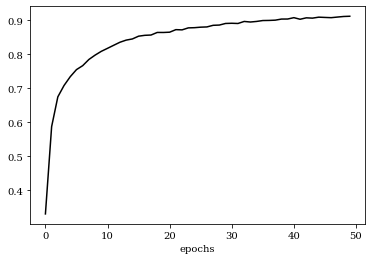

In [5]:
val_acc = hist.history['accuracy']
# https://stackoverflow.com/questions/54602399/why-am-i-having-keyerror-val-acc

import matplotlib.pyplot as plt
plt.rc('font', family='serif')
fig = plt.figure()
plt.plot(range(epochs), val_acc, label='acc', color='black')
plt.xlabel('epochs')
plt.show()

In [6]:
loss_and_metrics = model.evaluate(X_test, y_test)
print(loss_and_metrics)

8000/8000 [==============================] - 0s 38us/step
[0.22544353833049535, 0.9415000081062317]
